In [ ]:
!pip install numpy

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.9 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 817.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.3 MB 10.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/16.3 MB 21.5 MB/s eta 0:00:01
   ---------- ----------------------------- 4.1/16.3 MB 32.5 MB/s eta 0:00:01
   --------------- ------------------------ 6.4/16.3 MB 40.8 MB/s eta 0:00:01
   ------------------ --------------------- 7.3/16.3 MB 42.6 MB/s eta 0:00:01
   ---------------------- ----------------- 9.1/16.3 MB 36.3 MB/s eta 0:00:01
   ---------------------------- ----------- 11.7/16.3 MB 50.4 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.3 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.3 MB 50.1 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# 이미지 로드
from tensorflow.keras.preprocessing.image import load_img

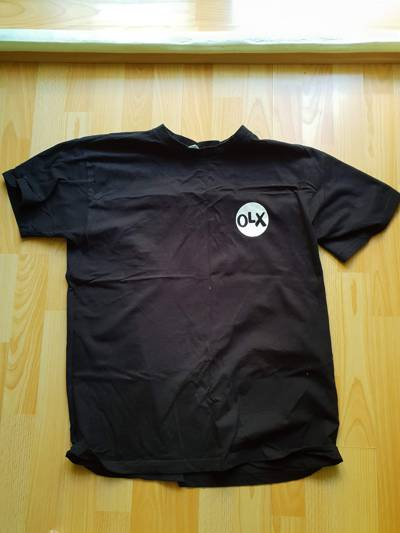

In [4]:
path = '/content/drive/MyDrive/clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

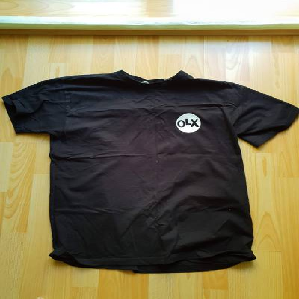

In [5]:
load_img(fullname, target_size=(299, 299))

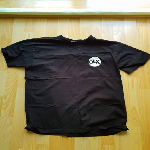

In [6]:
load_img(fullname, target_size=(150, 150))

의 코드는 학습할 데이터의 이미지의 사이즈를 줄이는 역할을 한다. (처리량 감소)

# Pre-Trained Neural Network
이미지넷 클래스가 있는 사전 훈련된 신경망을 적용해 본다.
텐서프로의 케라스를 이용한다.

https://keras.io/api/applications/
https://www.tensorflow.org/api_docs/python/tf/keras/applications


---
**3가지의 사전 준비물이 있어야한다.**

1. 모델자체와 예외모델
2. 이미지를 찍고 ㅓ리하는 preprocess_input 함수
3. 모델의 예측을 human-readable 클래스로 변환하는 사전 decode




In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

사전 모델 불러오기. 299x299의 사전학습된 훈련모델을 불러온다

In [8]:
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


다음으로 load_img 함수를 이용해 이미지를 로드하고 Numpy 배열로 변환한뒤 그걸 하나로 묶는다.

In [9]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

예측할 모델을 투입한뒤, 종류를 예측한다.
예측한 결과를 human-readable 형식으로 변환한다.

In [11]:
X = preprocess_input(X)
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 1000)

In [12]:
pred[0, :10]

array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

In [13]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

원하는결과가 안나오니 여기에 내가 가지고있는 모델을 훈련시킨다.

# Transfer learning
각 이미지를 하나씩 로드하는 대신 데이터 생성기를 사용한다.
이미지를 로드하고 전처리하는데 KERAS를 이용한다.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

코랩 하드웨어가 구데기여서 일단 작은 사이즈로 변환하여 학습시킨다.

In [15]:
image_size = (150, 150)
batch_size = 32

In [16]:
# 훈련 데이터 얻기
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [17]:
# 훈련모델 검증할 서전 분류된 검증 데이터 로드
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [18]:
# 150x150 크기의 Xception 모델 사용
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


분류할 클래스가 10개이니까.. 신경망을 추가한다. 10개 클래스에 대응하는 10개의 뉴런을 하나의 레이어로 생성한다.

In [19]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

이제 학습률 지정하고 학습시킨다!!!!

In [20]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [21]:
# 에폭값을 많이주면 정확도가 올라가지만 지나치면 과소적합 문제가 발생할수 있으니 조율이 필요하다
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 1250s 12s/step - accuracy: 0.5703 - loss: 1.7986 - val_accuracy: 0.7595 - val_loss: 0.9079
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 172ms/step - accuracy: 0.8412 - loss: 0.4681 - val_accuracy: 0.7859 - val_loss: 0.8387
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8922 - loss: 0.3202 - val_accuracy: 0.7889 - val_loss: 0.8977
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9076 - loss: 0.2672 - val_accuracy: 0.7977 - val_loss: 0.8202
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.9382 - loss: 0.1926 - val_accuracy: 0.8094 - val_loss: 0.8007
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9779 - loss: 0.0859 - val_accuracy: 0.8094 - val_loss: 0.8476
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.9697 - loss: 0.0975 - val_accuracy: 0.8299 - val_loss: 0.8425
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9934 - loss: 0.0355 - val_accuracy: 0.791

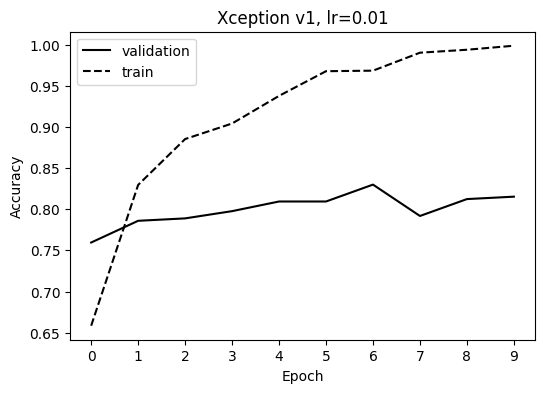

In [22]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v1_0_01.svg')

plt.show()

In [23]:
# 정확도를 올리기위해 함수를 최적화
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [24]:
model = make_model(learning_rate=0.001)
history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 216ms/step - accuracy: 0.4957 - loss: 1.4886 - val_accuracy: 0.7566 - val_loss: 0.7385
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.7845 - loss: 0.6391 - val_accuracy: 0.8065 - val_loss: 0.6346
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.8301 - loss: 0.5198 - val_accuracy: 0.7830 - val_loss: 0.6172
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.8681 - loss: 0.4211 - val_accuracy: 0.8182 - val_loss: 0.5573
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.8980 - loss: 0.3709 - val_accuracy: 0.8270 - val_loss: 0.5666
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9108 - loss: 0.3176 - val_accuracy: 0.8328 - val_loss: 0.5463
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9267 - loss: 0.2833 - val_accuracy: 0.8123 - val_loss: 0.5501
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9361 - loss: 0.2527 - val_accu

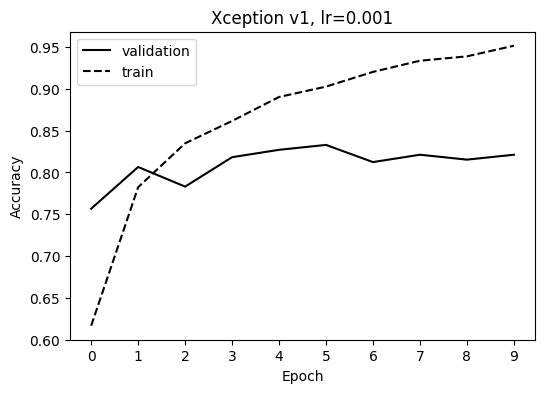

In [25]:
plt.figure(figsize=(6, 4))

epochs = history_0_001.epoch
val = history_0_001.history['val_accuracy']
train = history_0_001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v1_0_001.svg')

plt.show()

In [26]:
model = make_model(learning_rate=0.0001)
history_0_0001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 243ms/step - accuracy: 0.3129 - loss: 2.0319 - val_accuracy: 0.5161 - val_loss: 1.5313
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.5672 - loss: 1.4119 - val_accuracy: 0.6334 - val_loss: 1.2075
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.6549 - loss: 1.1538 - val_accuracy: 0.6891 - val_loss: 1.0348
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.6948 - loss: 1.0092 - val_accuracy: 0.7214 - val_loss: 0.9321
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.7195 - loss: 0.9238 - val_accuracy: 0.7361 - val_loss: 0.8607
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.7295 - loss: 0.8620 - val_accuracy: 0.7566 - val_loss: 0.8120
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.7474 - loss: 0.7799 - val_accuracy: 0.7566 - val_loss: 0.7712
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.7646 - loss: 0.7399 - val_accu

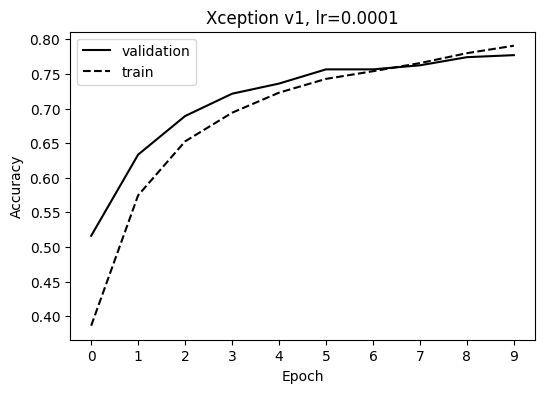

In [27]:
plt.figure(figsize=(6, 4))

epochs = history_0_0001.epoch
val = history_0_0001.history['val_accuracy']
train = history_0_0001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.0001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v1_0_0001.svg')

plt.show()

In [28]:
epochs = np.arange(10)
val_0_01 = history.history['val_accuracy']
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']

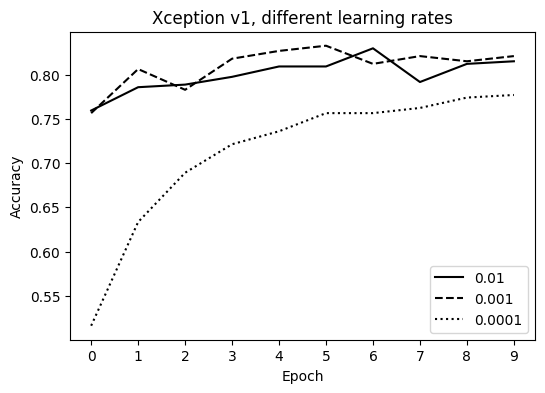

In [29]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_01, color='black', linestyle='solid', label='0.01')
plt.plot(epochs, val_0_001, color='black', linestyle='dashed', label='0.001')
plt.plot(epochs, val_0_0001, color='black', linestyle='dotted', label='0.0001')


plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

plt.savefig('/content/drive/MyDrive/ML_RES/xception_v1_all_lr.svg')

plt.show()

In [30]:
model = make_model(learning_rate=0.001)

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 246ms/step - accuracy: 0.5023 - loss: 1.4726 - val_accuracy: 0.7331 - val_loss: 0.7554
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.7784 - loss: 0.6598 - val_accuracy: 0.8006 - val_loss: 0.6310
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.8389 - loss: 0.5058 - val_accuracy: 0.7918 - val_loss: 0.6234
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.8599 - loss: 0.4153 - val_accuracy: 0.8035 - val_loss: 0.5824
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.8876 - loss: 0.3798 - val_accuracy: 0.8006 - val_loss: 0.5686
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.9064 - loss: 0.3246 - val_accuracy: 0.8094 - val_loss: 0.5491
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9223 - loss: 0.2903 - val_accuracy: 0.7947 - val_loss: 0.5523
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.9441 - loss: 0.2429 - val_accu

콜백하며 모델을 최적화하고 저장하는 과정까지 완료했다. 이제 레이어를 하나 더 추가하고 드롭아웃을 추가한다.

In [32]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [33]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - accuracy: 0.5517 - loss: 1.2971 - val_accuracy: 0.8006 - val_loss: 0.6533
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.8274 - loss: 0.5092 - val_accuracy: 0.7830 - val_loss: 0.5898
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.8846 - loss: 0.3502 - val_accuracy: 0.8270 - val_loss: 0.6015
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.9349 - loss: 0.2286 - val_accuracy: 0.8094 - val_loss: 0.5874
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.9497 - loss: 0.1828 - val_accuracy: 0.8270 - val_loss: 0.5926
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.9666 - loss: 0.1366 - val_accuracy: 0.8094 - val_loss: 0.6084
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.9789 - loss: 0.1001 - val_accuracy: 0.8152 - val_loss: 0.6062
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9917 - loss: 0.0620 - val_accu

In [34]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v2_0_2_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_1 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 271ms/step - accuracy: 0.5119 - loss: 1.4435 - val_accuracy: 0.7537 - val_loss: 0.7037
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step - accuracy: 0.7840 - loss: 0.6273 - val_accuracy: 0.7771 - val_loss: 0.5821
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.8369 - loss: 0.4623 - val_accuracy: 0.7947 - val_loss: 0.5408
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.8781 - loss: 0.3627 - val_accuracy: 0.8152 - val_loss: 0.5661
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.8975 - loss: 0.2884 - val_accuracy: 0.8270 - val_loss: 0.5343
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.9262 - loss: 0.2384 - val_accuracy: 0.8240 - val_loss: 0.5287
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9429 - loss: 0.1938 - val_accuracy: 0.8152 - val_loss: 0.5409
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.9613 - loss: 0.1512 - val_accu

In [35]:
model = make_model(learning_rate=0.001, droprate=0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v2_0_5_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_2 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 253ms/step - accuracy: 0.4810 - loss: 1.5654 - val_accuracy: 0.7273 - val_loss: 0.7872
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.7126 - loss: 0.8550 - val_accuracy: 0.7947 - val_loss: 0.6474
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.7611 - loss: 0.6898 - val_accuracy: 0.8123 - val_loss: 0.5906
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8044 - loss: 0.5749 - val_accuracy: 0.8152 - val_loss: 0.5421
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8246 - loss: 0.4989 - val_accuracy: 0.8182 - val_loss: 0.5150
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.8511 - loss: 0.4643 - val_accuracy: 0.8152 - val_loss: 0.5560
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.8564 - loss: 0.4081 - val_accuracy: 0.8211 - val_loss: 0.5207
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.8679 - loss: 0.3802 - val_accu

In [36]:
model = make_model(learning_rate=0.001, droprate=0.8)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v2_0_8_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_3 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.2735 - loss: 2.1656 - val_accuracy: 0.6188 - val_loss: 1.2393
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 191ms/step - accuracy: 0.4546 - loss: 1.5200 - val_accuracy: 0.7331 - val_loss: 1.0194
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.5313 - loss: 1.2993 - val_accuracy: 0.7302 - val_loss: 0.9118
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.5353 - loss: 1.2681 - val_accuracy: 0.6950 - val_loss: 0.8694
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.5665 - loss: 1.1795 - val_accuracy: 0.7683 - val_loss: 0.7706
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.6024 - loss: 1.0552 - val_accuracy: 0.7771 - val_loss: 0.7288
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - accuracy: 0.6244 - loss: 1.0621 - val_accuracy: 0.7742 - val_loss: 0.7280
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.6199 - loss: 1.0239 - val_accu

In [37]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']
train08 = history_3.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']
val08 = history_3.history['val_accuracy']

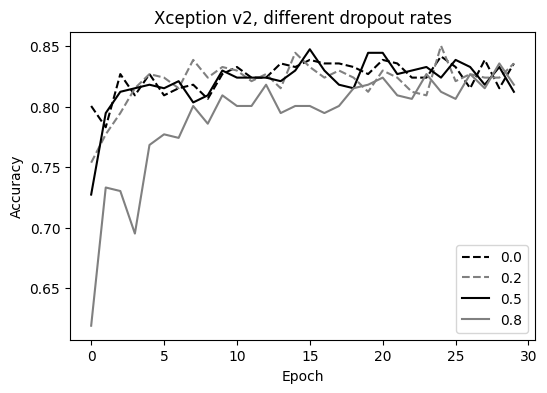

In [38]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, val08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v2_dropout.svg')

plt.show()

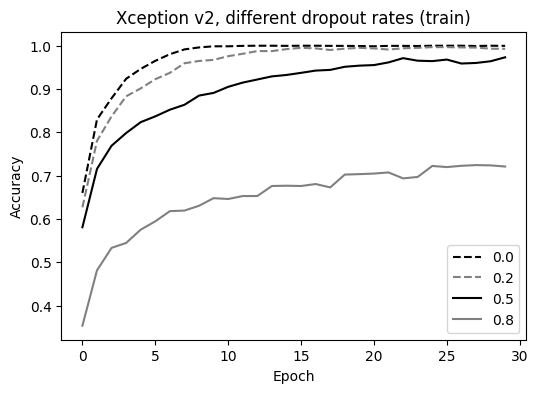

In [39]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, train08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v2_dropout_train.svg')

plt.show()

# 데이터 증강


In [40]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [41]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [42]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v3_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 399ms/step - accuracy: 0.5318 - loss: 1.4234 - val_accuracy: 0.7771 - val_loss: 0.6721
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.7382 - loss: 0.7251 - val_accuracy: 0.7859 - val_loss: 0.6173
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - accuracy: 0.7821 - loss: 0.6104 - val_accuracy: 0.8006 - val_loss: 0.6017
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 344ms/step - accuracy: 0.8169 - loss: 0.5247 - val_accuracy: 0.8065 - val_loss: 0.5297
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 320ms/step - accuracy: 0.8482 - loss: 0.4609 - val_accuracy: 0.8035 - val_loss: 0.5393
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.8639 - loss: 0.3965 - val_accuracy: 0.8035 - val_loss: 0.5401
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.8599 - loss: 0.3887 - val_accuracy: 0.8152 - val_loss: 0.5536
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.8771 - loss: 0.3367 - val_accuracy: 0.827

In [43]:
epochs = history.epoch
accuracy = history.history['val_accuracy']

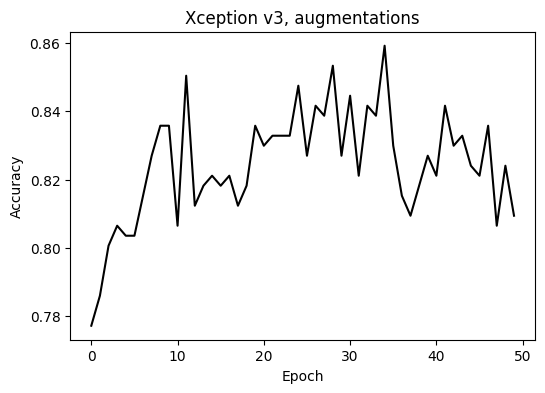

In [44]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, accuracy, color='black', linestyle='solid')


plt.title('Xception v3, augmentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.savefig('/content/drive/MyDrive/ML_RES/MODEL/xception_v3_aug.svg')

plt.show()

In [45]:
# 훈련 데이터 크기 증강

def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(299, 299, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(299, 299, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [46]:
image_size = (299, 299)
batch_size = 32

In [47]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [48]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [49]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/ML_RES/MODEL/xception_v4_large_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_l = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6115 - loss: 1.1722 - val_accuracy: 0.8387 - val_loss: 0.4512
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 87s 842ms/step - accuracy: 0.8466 - loss: 0.4496 - val_accuracy: 0.8710 - val_loss: 0.3968
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 139s 827ms/step - accuracy: 0.8701 - loss: 0.3932 - val_accuracy: 0.8622 - val_loss: 0.3978
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 142s 831ms/step - accuracy: 0.8941 - loss: 0.3205 - val_accuracy: 0.8710 - val_loss: 0.3669
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 142s 832ms/step - accuracy: 0.8955 - loss: 0.3046 - val_accuracy: 0.8827 - val_loss: 0.3724
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 143s 830ms/step - accuracy: 0.9044 - loss: 0.2726 - val_accuracy: 0.8856 - val_loss: 0.3855
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 796ms/step - accuracy: 0.9192 - loss: 0.2423 - val_accuracy: 0.8592 - val_loss: 0.3845
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 813ms/step - accuracy: 0.9115 - loss: 0.2493 - val_ac

# 모델 테스트

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [ ]:
image_size = (299, 299)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/ML_RES/MODEL/xception_v4_large_08_0.894.keras')

In [ ]:
path = '/content/drive/MyDrive/clothing-dataset-small-master/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [ ]:
# 입력한 이미지를 전처리

x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)
pred[0]

In [ ]:
pred[0].argmax()

In [ ]:
# 해당 이미지의 분류된 라벨 출력
labels[pred[0].argmax()]

In [ ]:
# 모델 정확도 출력 및 테스트
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

In [ ]:
model.evaluate(test_ds)

# 소형모델
150x150 의 이미지 분석(속도는 향상되지만 정확도는 떨어짐)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/ML_RES/MODEL/xception_v3_44_0.853.keras')

In [ ]:
image_size = (150, 150)

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "/content/drive/MyDrive/clothing-dataset-small-master/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

In [ ]:
# 정확도 테스트
model.evaluate(test_ds)